# HR Analytics Project- Understanding the Attrition in HR


Project Description


Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?


HR Analytics


Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.


Attrition in HR


Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.


Attrition affecting Companies


A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.



#  Extra Trees Classifier Model



# Step 1: importing necessary libraries and load the data

In [58]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [59]:
#loading dataset
hr=pd.read_csv(r'C:\Users\HP\Files-main\WA_Fn-UseC_-HR-Employee-Attrition.csv')
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In the given dataset there 35 columns of which Attrition is target variable. It is a classification model.

#  Step 2: Exploratory Data Analysis (EDA) 

In [60]:
# finding the shape of dataset
hr.shape

(1470, 35)

In [61]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [62]:
#displaying the list of columns
hr.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [63]:
#finding the null values
hr.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Yes, there is no null values

In [64]:
#Getting the normal summary and statistical information of the data
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are zero null values, 26 int64 type and 9 object type

In [65]:
#checking unique values for given dataset

hr.nunique().to_frame("Unique values")

,Unique values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [66]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [67]:
hr['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [68]:
hr['Attrition']=np.where(hr['Attrition']=='Yes',1,0)

In [69]:
hr['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [70]:
hr['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [71]:
hr['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [72]:
hr['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [73]:
hr.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


As per my observation, the value count is same in all the columns which indicates no missing data.
The difference between the mean and standard devaition of each is not very less.
The mean value is more than 50% of median in all columns so, there will skewness problem.
Also we can have min, 75%, max values.

In [74]:
#seperating the categorical column and numerical column
categorical_col=[]
for i in hr.dtypes.index:
    if hr.dtypes[i] == "object":
        categorical_col.append(i)
print("categorical column: ", categorical_col)
print("\n")

numerical_col=[]
for i in hr.dtypes.index:
    if hr.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical column: ", numerical_col)
print("\n")

categorical column:  ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


numerical column:  ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']




# Step 3: Visualization

Univariate Analysis: 

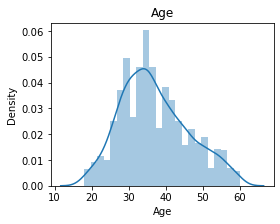

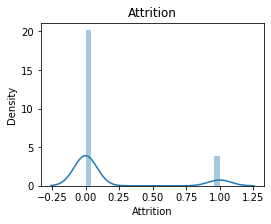

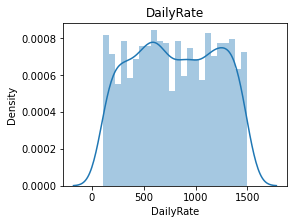

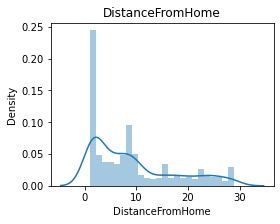

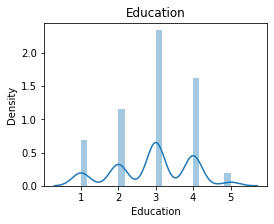

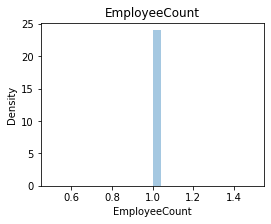

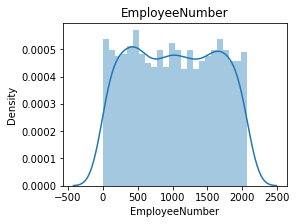

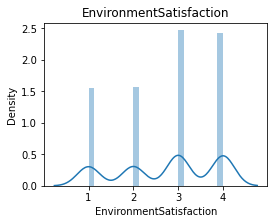

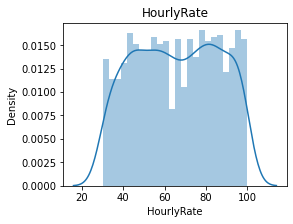

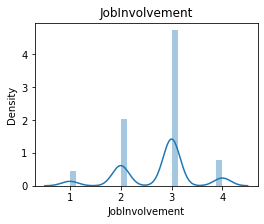

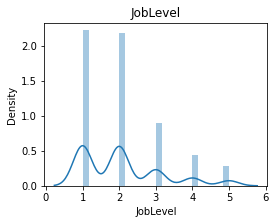

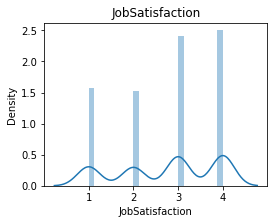

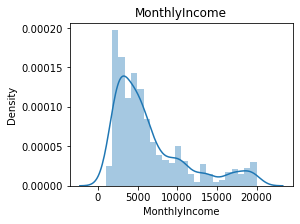

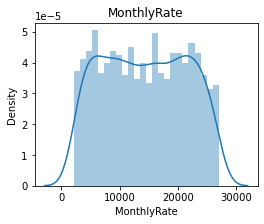

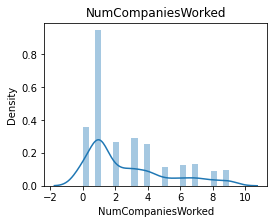

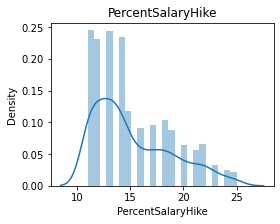

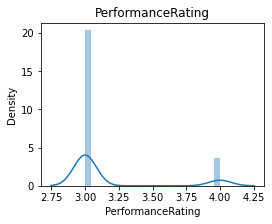

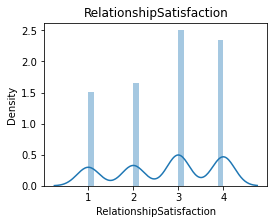

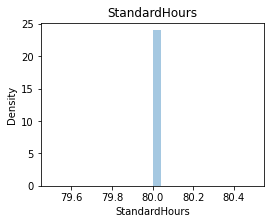

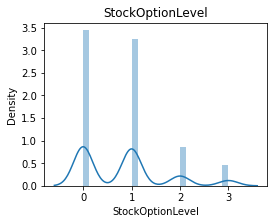

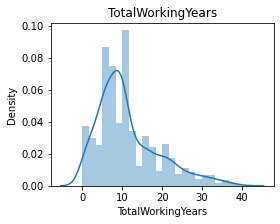

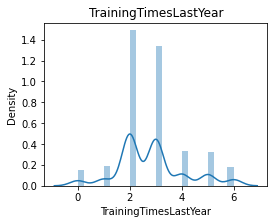

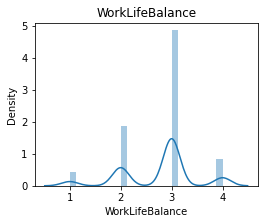

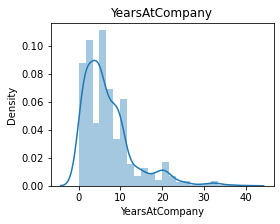

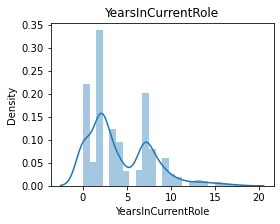

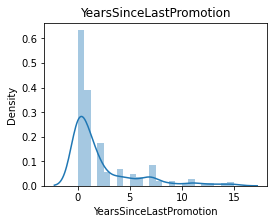

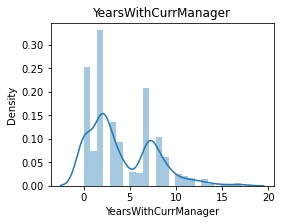

In [75]:
#distribution plot for numerical columns
for k in hr[numerical_col]:              
    plt.figure(figsize = (4, 3))
    sns.distplot(hr[k], bins = 24)
    plt.title(k)
    plt.show()

<AxesSubplot:xlabel='Attrition', ylabel='count'>

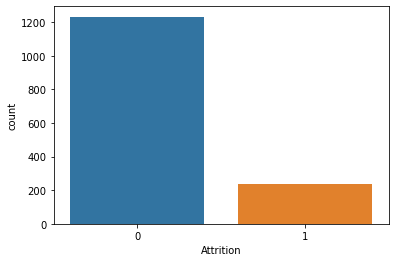

In [76]:
sns.countplot(hr.Attrition)

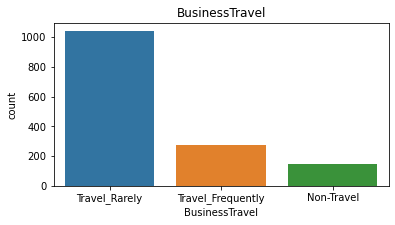

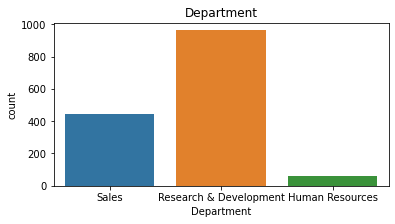

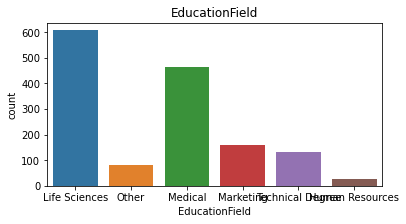

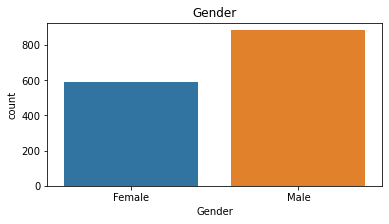

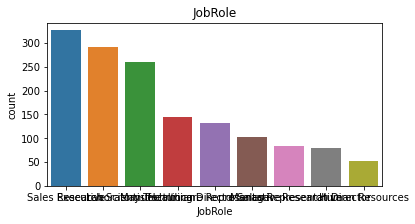

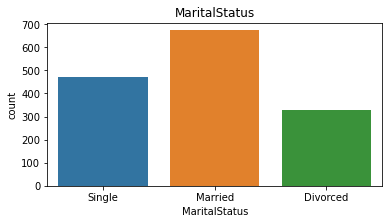

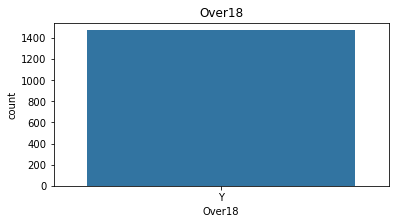

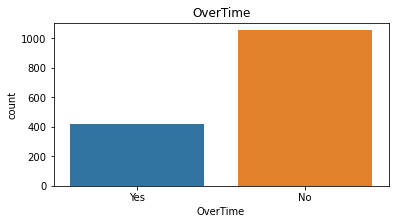

In [77]:
#distribution plot for numerical columns
for k in hr[categorical_col]:              
    plt.figure(figsize = (6, 3))
    sns.countplot(hr[k])
    plt.title(k)
    plt.show()

# Multivariate analysis:


    

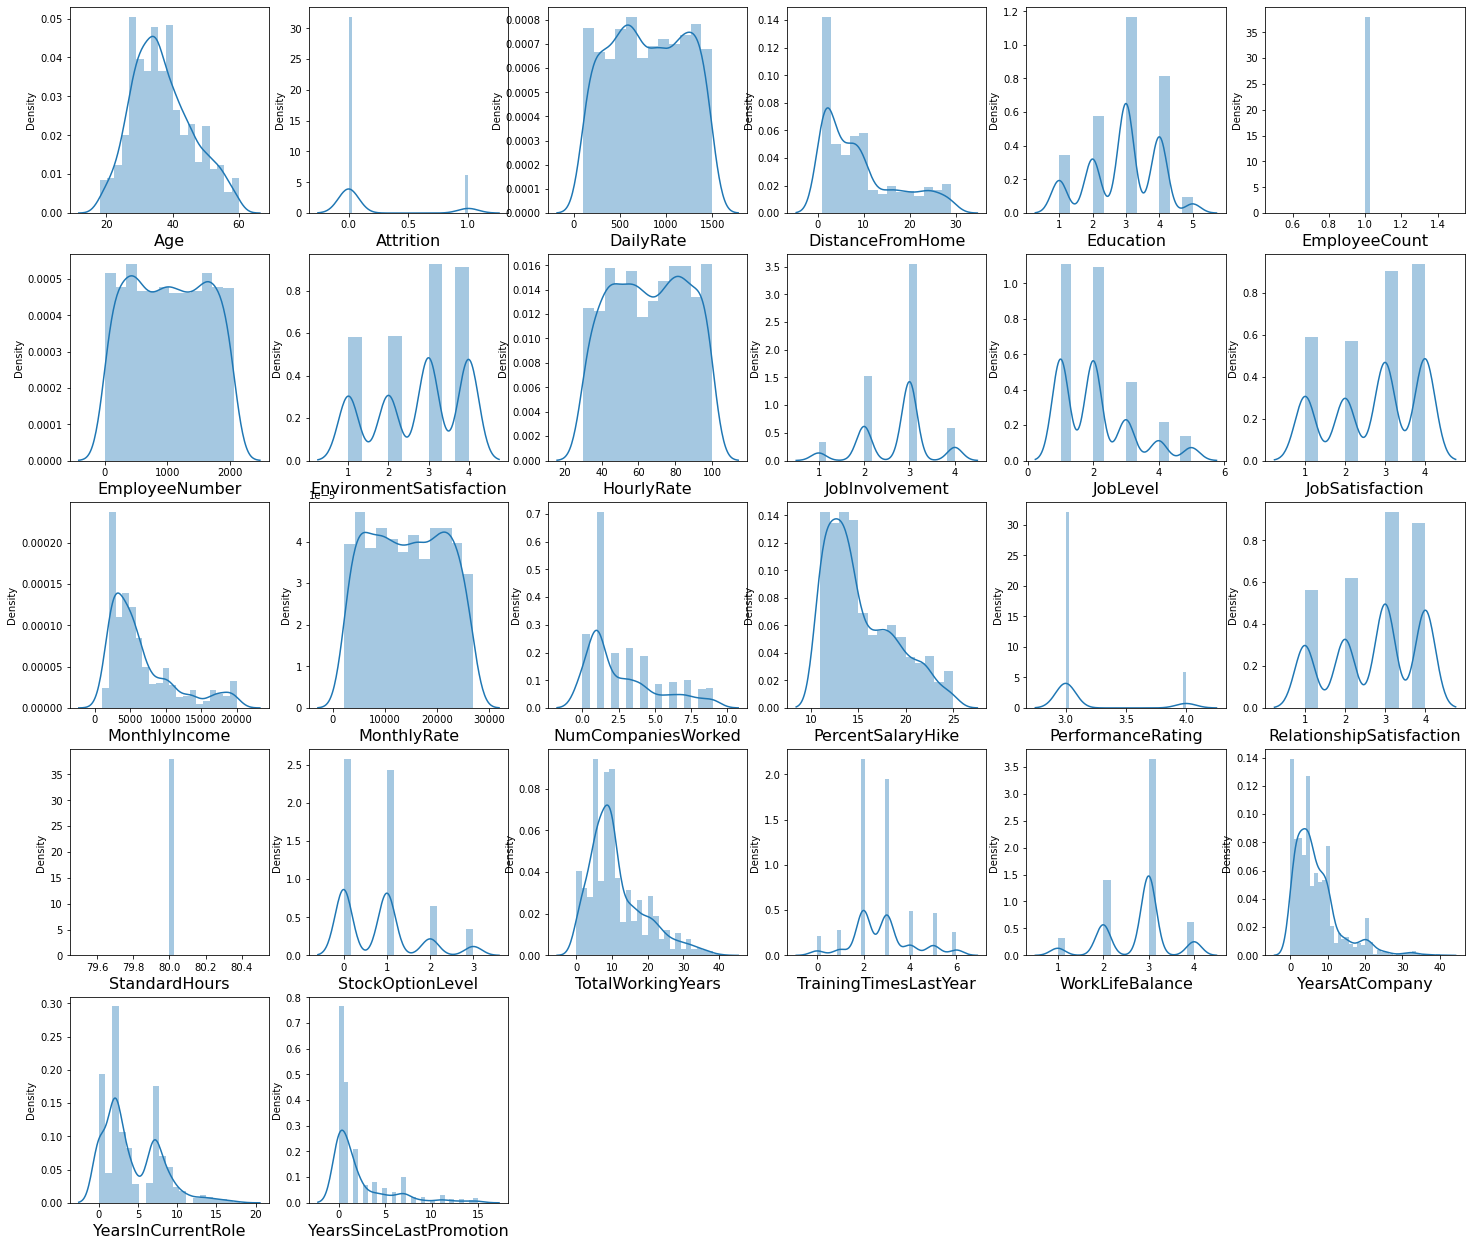

In [78]:
plt.figure(figsize=(25,22),facecolor="white")
plotnumber=1
for columns in numerical_col:
    if plotnumber<=26:
    
        ax=plt.subplot(5,6,plotnumber)
        sns.distplot(hr[columns])
        plt.xlabel(columns, fontsize=16)
        
    plotnumber+=1
plt.show()

As we can mostly half of the columns are not normally distributed .

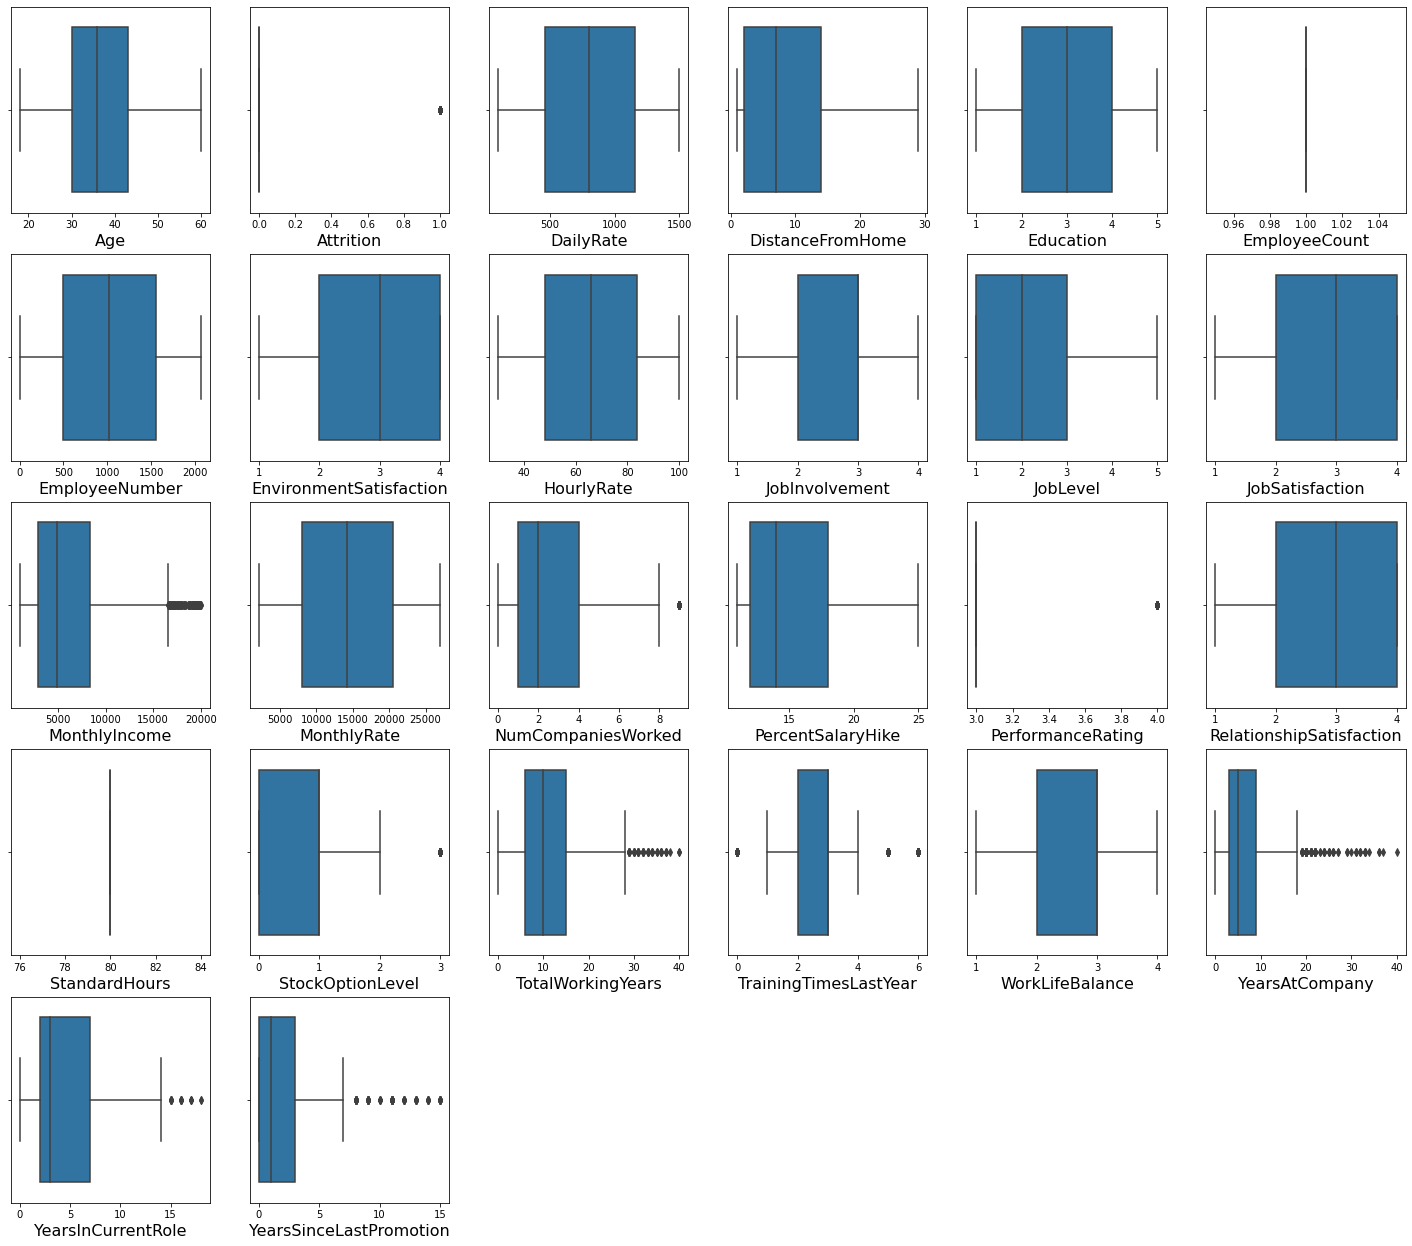

In [79]:
plt.figure(figsize=(25,22),facecolor="white")
plotnumber=1
for columns in numerical_col:
    if plotnumber<=26:
    
        ax=plt.subplot(5,6,plotnumber)
        sns.boxplot(hr[columns])
        plt.xlabel(columns, fontsize=16)
    plotnumber+=1
plt.show()

    From the above plots, montlyincome,numcompaniesworked,performancerating,totalworking hours, trainingtimeslater,worklifebalance,workatcompany,yerascurrentrole and yearssincelastpromotion columns has outliers. for removeing the outliers i am using iqr method as below.

In [80]:
#removing outliers
hr['MonthlyIncome']=hr['MonthlyIncome'].replace(0,hr['MonthlyIncome'].mean())

hr['NumCompaniesWorked']=hr['NumCompaniesWorked'].replace(0,hr['NumCompaniesWorked'].mean())

hr['PerformanceRating']=hr['PerformanceRating'].replace(0,hr['PerformanceRating'].mean())

hr['StockOptionLevel']=hr['StockOptionLevel'].replace(0,hr['StockOptionLevel'].mean())

hr['TotalWorkingYears']=hr['TotalWorkingYears'].replace(0,hr['TotalWorkingYears'].mean())

hr['TrainingTimesLastYear']=hr['TrainingTimesLastYear'].replace(0,hr['TrainingTimesLastYear'].mean())

hr['YearsAtCompany']=hr['YearsAtCompany'].replace(0,hr['YearsAtCompany'].mean())

hr['YearsInCurrentRole']=hr['YearsInCurrentRole'].replace(0,hr['YearsInCurrentRole'].mean())

hr['YearsSinceLastPromotion']=hr['YearsSinceLastPromotion'].replace(0,hr['YearsSinceLastPromotion'].mean())

hr['YearsWithCurrManager']=hr['YearsWithCurrManager'].replace(0,hr['YearsWithCurrManager'].mean())



In [81]:
#quantiles for train data
q1=hr.quantile(0.25)
q3=hr.quantile(0.75)
iqr=q3-q1

In [82]:
numerical_col

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [83]:
MonthlyIncome_high=q3.MonthlyIncome+1.5*iqr.MonthlyIncome
MonthlyIncome_high

index=np.where(hr['MonthlyIncome']>MonthlyIncome_high)

NumCompaniesWorked_high=q3.NumCompaniesWorked+1.5*iqr.NumCompaniesWorked
NumCompaniesWorked_high

index=np.where(hr['NumCompaniesWorked']>NumCompaniesWorked_high)

PerformanceRating_high=q3.PerformanceRating+1.5*iqr.PerformanceRating
PerformanceRating_high

index=np.where(hr['PerformanceRating']>PerformanceRating_high)

StockOptionLevel_high=q3.StockOptionLevel+1.5*iqr.StockOptionLevel
StockOptionLevel_high

index=np.where(hr['StockOptionLevel']>StockOptionLevel_high)


TotalWorkingYears_high=q3.TotalWorkingYears+1.5*iqr.TotalWorkingYears
TotalWorkingYears_high

index=np.where(hr['TotalWorkingYears']>TotalWorkingYears_high)

YearsAtCompany_high=q3.YearsAtCompany+1.5*iqr.YearsAtCompany
YearsAtCompany_high

index=np.where(hr['YearsAtCompany']>YearsAtCompany_high)

YearsInCurrentRole_high=q3.YearsInCurrentRole+1.5*iqr.YearsInCurrentRole
YearsInCurrentRole_high

index=np.where(hr['YearsInCurrentRole']>YearsInCurrentRole_high)


TrainingTimesLastYear_high=q3.TrainingTimesLastYear+1.5*iqr.TrainingTimesLastYear
TrainingTimesLastYear_high

index=np.where(hr['TrainingTimesLastYear']>TrainingTimesLastYear_high)


TrainingTimesLastYear_low=q3.TrainingTimesLastYear-(1.5*iqr.TrainingTimesLastYear)
TrainingTimesLastYear_low

index=np.where(hr['TrainingTimesLastYear']<TrainingTimesLastYear_low)


YearsSinceLastPromotion_high=q3.YearsSinceLastPromotion+1.5*iqr.YearsSinceLastPromotion
YearsSinceLastPromotion_high

index=np.where(hr['YearsSinceLastPromotion']>YearsSinceLastPromotion_high)

YearsWithCurrManager_high=q3.YearsWithCurrManager+1.5*iqr.YearsWithCurrManager
YearsWithCurrManager_high

index=np.where(hr['YearsWithCurrManager']>YearsWithCurrManager_high)

hr=hr.drop(hr.index[index])
hr.shape

hr.reset_index()


,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0.793878,8.0,2.79932,1,6.000000,4.000000,2.187755,5.000000
1,1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1.000000,10.0,3.00000,3,10.000000,7.000000,1.000000,7.000000
2,2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0.793878,7.0,3.00000,3,7.008163,4.229252,2.187755,4.123129
3,3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0.793878,8.0,3.00000,3,8.000000,7.000000,3.000000,4.123129
4,4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1.000000,6.0,3.00000,3,2.000000,2.000000,2.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1.000000,17.0,3.00000,3,5.000000,2.000000,2.187755,3.000000
1452,1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1.000000,9.0,5.00000,3,7.000000,7.000000,1.000000,7.000000
1453,1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1.000000,6.0,2.79932,3,6.000000,2.000000,2.187755,3.000000
1454,1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0.793878,17.0,3.00000,2,9.000000,6.000000,2.187755,8.000000


In [84]:
loss_data=(1470-1456)/1470*100
loss_data

0.9523809523809524

In [85]:
#checking skewness
hr.skew()

Age                         0.426649
Attrition                   1.828872
DailyRate                  -0.009317
DistanceFromHome            0.956812
Education                  -0.281629
EmployeeCount               0.000000
EmployeeNumber              0.012197
EnvironmentSatisfaction    -0.320320
HourlyRate                 -0.037708
JobInvolvement             -0.499494
JobLevel                    1.038429
JobSatisfaction            -0.332882
MonthlyIncome               1.391844
MonthlyRate                 0.015701
NumCompaniesWorked          1.116759
PercentSalaryHike           0.814390
PerformanceRating           1.920786
RelationshipSatisfaction   -0.300114
StandardHours               0.000000
StockOptionLevel            2.151686
TotalWorkingYears           1.159758
TrainingTimesLastYear       0.987727
WorkLifeBalance            -0.552607
YearsAtCompany              1.874449
YearsInCurrentRole          1.149509
YearsSinceLastPromotion     2.334659
YearsWithCurrManager        0.821711
d

normally sknewness range is -0.5 to 0.5 but i got more than this range so i am using power transformation and decresing it. 

In [86]:
#applying powertransformation
hr['YearsSinceLastPromotion']=np.cbrt(hr['YearsSinceLastPromotion'])


In [87]:
hr.skew()

Age                         0.426649
Attrition                   1.828872
DailyRate                  -0.009317
DistanceFromHome            0.956812
Education                  -0.281629
EmployeeCount               0.000000
EmployeeNumber              0.012197
EnvironmentSatisfaction    -0.320320
HourlyRate                 -0.037708
JobInvolvement             -0.499494
JobLevel                    1.038429
JobSatisfaction            -0.332882
MonthlyIncome               1.391844
MonthlyRate                 0.015701
NumCompaniesWorked          1.116759
PercentSalaryHike           0.814390
PerformanceRating           1.920786
RelationshipSatisfaction   -0.300114
StandardHours               0.000000
StockOptionLevel            2.151686
TotalWorkingYears           1.159758
TrainingTimesLastYear       0.987727
WorkLifeBalance            -0.552607
YearsAtCompany              1.874449
YearsInCurrentRole          1.149509
YearsSinceLastPromotion     1.303625
YearsWithCurrManager        0.821711
d

In [88]:
#corelation b/n features and target variable.
corr=hr.corr()
corr

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.156630,0.014375,-0.004945,0.204218,NaN,-0.005180,0.012498,0.030303,0.027874,...,0.052239,NaN,0.000192,0.661286,-0.022720,-0.024265,0.284537,0.193441,0.184179,0.179466
Attrition,-0.156630,1.000000,-0.059032,0.079682,-0.029364,NaN,-0.012377,-0.103883,-0.008610,-0.130191,...,-0.045535,NaN,-0.070668,-0.159464,-0.038324,-0.063403,-0.111525,-0.097617,-0.002517,-0.065746
DailyRate,0.014375,-0.059032,1.000000,-0.002777,-0.015904,NaN,-0.053840,0.023147,0.015958,0.046201,...,0.009927,NaN,0.035069,0.017577,-0.009420,-0.034942,-0.027957,0.012382,-0.013941,-0.037327
DistanceFromHome,-0.004945,0.079682,-0.002777,1.000000,0.018949,NaN,0.032413,-0.019189,0.035786,0.005645,...,0.005809,NaN,0.047162,-0.001432,-0.035371,-0.026146,0.002175,0.009618,-0.005162,0.009347
Education,0.204218,-0.029364,-0.015904,0.018949,1.000000,NaN,0.042906,-0.026005,0.019486,0.042980,...,-0.008510,NaN,0.020809,0.136220,-0.027008,0.007397,0.057403,0.048818,0.060556,0.054843
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.005180,-0.012377,-0.053840,0.032413,0.042906,NaN,1.000000,0.015292,0.032910,-0.005992,...,-0.065742,NaN,0.057504,-0.010381,0.027773,0.007175,-0.003901,-0.007826,-0.021738,-0.005546
EnvironmentSatisfaction,0.012498,-0.103883,0.023147,-0.019189,-0.026005,NaN,0.015292,1.000000,-0.048323,-0.007832,...,0.007338,NaN,-0.009922,0.001036,-0.008327,0.023576,0.002917,0.022045,-0.004584,-0.007421
HourlyRate,0.030303,-0.008610,0.015958,0.035786,0.019486,NaN,0.032910,-0.048323,1.000000,0.041680,...,0.002613,NaN,0.046005,0.006785,0.010737,0.001279,-0.003041,-0.014114,-0.012553,0.007831
JobInvolvement,0.027874,-0.130191,0.046201,0.005645,0.042980,NaN,-0.005992,-0.007832,0.041680,1.000000,...,0.033038,NaN,0.012996,-0.005256,0.010296,-0.011908,-0.024316,-0.012301,-0.021607,-0.013013


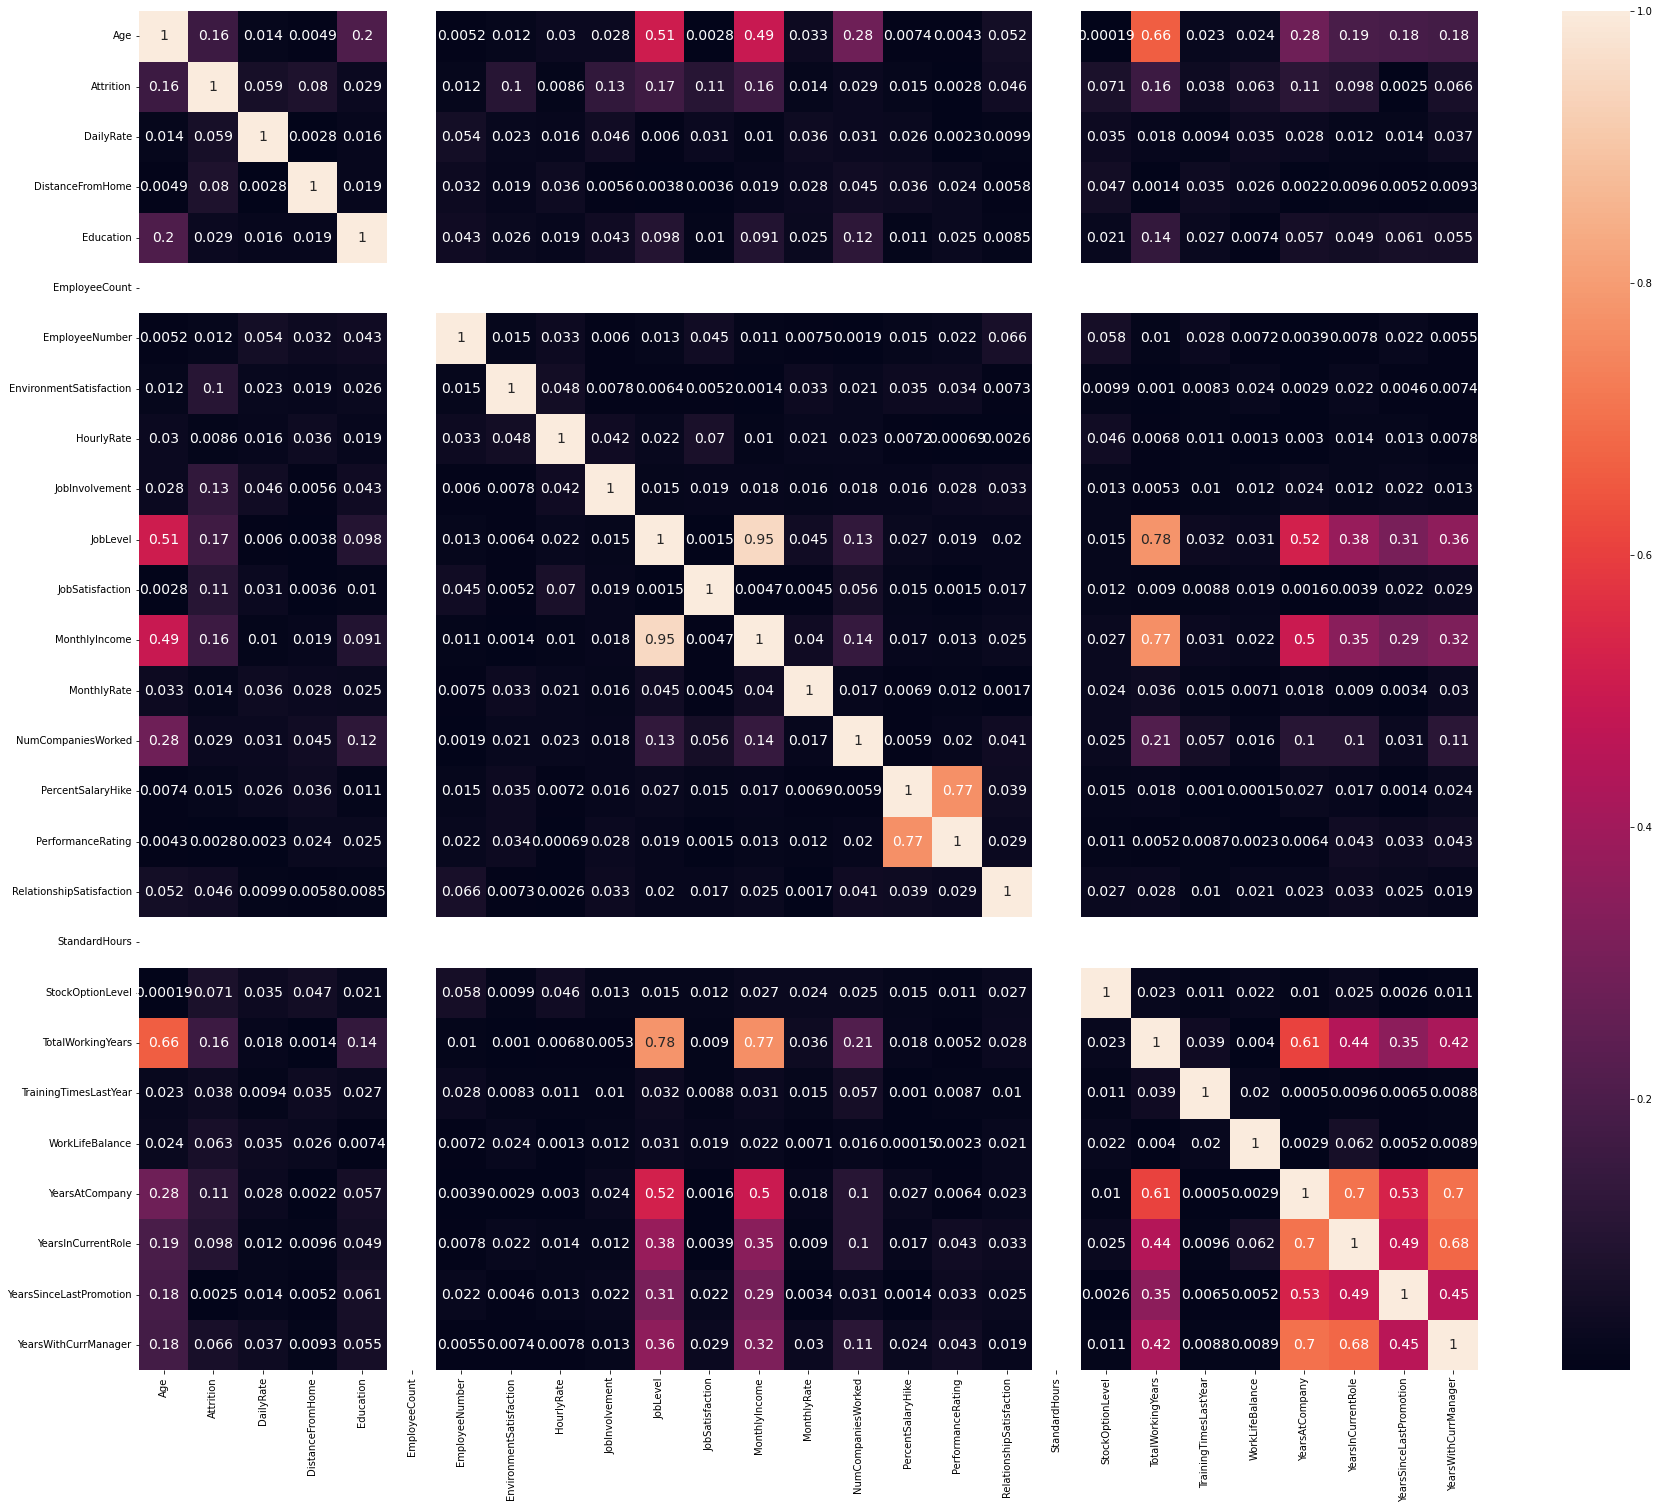

In [89]:
df_corr=hr.corr().abs()
plt.figure(figsize=(30,25))
sns.heatmap(df_corr, annot=True, linecolor='blue', annot_kws={'size':14},)
plt.show()

totalworkingyears has highest correlation with  age, joblevel, monthly income so i am dropping this column.

In [90]:
hr.drop("TotalWorkingYears",axis=1, inplace=True)


In [91]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,3,1,80,0.793878,2.79932,1,6.000000,4.000000,1.298174,5.000000
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,4,80,1.000000,3.00000,3,10.000000,7.000000,1.000000,7.000000
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,2,80,0.793878,3.00000,3,7.008163,4.229252,1.298174,4.123129
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,80,0.793878,3.00000,3,8.000000,7.000000,1.442250,4.123129
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,4,80,1.000000,3.00000,3,2.000000,2.000000,1.259921,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,3,80,1.000000,3.00000,3,5.000000,2.000000,1.298174,3.000000
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,3,1,80,1.000000,5.00000,3,7.000000,7.000000,1.000000,7.000000
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,4,2,80,1.000000,2.79932,3,6.000000,2.000000,1.298174,3.000000
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,3,4,80,0.793878,3.00000,2,9.000000,6.000000,1.298174,8.000000


In [92]:
#fixing features and label

a=hr.drop('Attrition', axis=1)
b=hr['Attrition']

In [93]:
a=pd.get_dummies(a,drop_first=True)

In [94]:
a

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,1,2064,2,87,4,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,0,0,0,1,0,1,0,0


In [95]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled
a=pd.DataFrame(scaler.fit_transform(a),columns=a.columns)
a

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.454587,0.737894,-1.010057,-0.885255,0.0,-1.705090,-0.661052,1.380015,0.379735,-0.047557,...,-0.461880,-0.268635,-0.331295,-0.2363,-0.499785,1.865476,-0.245869,-0.919442,1.459857,1.586477
1,1.330958,-1.302478,-0.144755,-1.860241,0.0,-1.703428,0.255607,-0.244718,-1.023551,-0.047557,...,-0.461880,-0.268635,-0.331295,-0.2363,2.000859,-0.536056,-0.245869,1.087616,-0.684999,-0.630328
2,0.016402,1.409754,-0.886442,-0.885255,0.0,-1.700105,1.172266,1.281546,-1.023551,-0.958648,...,2.165064,-0.268635,-0.331295,-0.2363,-0.499785,-0.536056,-0.245869,-0.919442,1.459857,1.586477
3,-0.421783,1.456858,-0.762828,1.064717,0.0,-1.698444,1.172266,-0.490889,0.379735,-0.958648,...,-0.461880,-0.268635,-0.331295,-0.2363,2.000859,-0.536056,-0.245869,1.087616,-0.684999,1.586477
4,-1.079061,-0.528971,-0.886442,-1.860241,0.0,-1.695121,-1.577712,-1.278638,0.379735,-0.958648,...,2.165064,-0.268635,-0.331295,-0.2363,-0.499785,-0.536056,-0.245869,1.087616,-0.684999,-0.630328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,-0.093144,0.197431,1.709464,-0.885255,0.0,1.717580,0.255607,-1.229404,1.783022,-0.047557,...,2.165064,-0.268635,-0.331295,-0.2363,-0.499785,-0.536056,-0.245869,1.087616,-0.684999,-0.630328
1452,0.235494,-0.474429,-0.391984,-1.860241,0.0,1.719242,1.172266,-1.180169,-1.023551,0.863534,...,-0.461880,-0.268635,-0.331295,-0.2363,-0.499785,-0.536056,-0.245869,1.087616,-0.684999,-0.630328
1453,-1.079061,-1.609897,-0.639213,0.089731,0.0,1.722565,-0.661052,1.035375,1.783022,-0.047557,...,-0.461880,-0.268635,3.018462,-0.2363,-0.499785,-0.536056,-0.245869,1.087616,-0.684999,1.586477
1454,1.330958,0.542038,-0.886442,0.089731,0.0,1.724226,1.172266,-0.146249,-1.023551,-0.047557,...,-0.461880,-0.268635,-0.331295,-0.2363,-0.499785,1.865476,-0.245869,1.087616,-0.684999,-0.630328


In [96]:
x_scaled

array([[ 0.45458707,  0.73789372, -1.01005689, ..., -0.91944216,
         1.45985711,  1.58647667],
       [ 1.33095751, -1.3024776 , -0.14475473, ...,  1.08761599,
        -0.68499855, -0.63032758],
       [ 0.01640185,  1.40975354, -0.88644229, ..., -0.91944216,
         1.45985711,  1.58647667],
       ...,
       [-1.0790612 , -1.60989685, -0.6392131 , ...,  1.08761599,
        -0.68499855,  1.58647667],
       [ 1.33095751,  0.54203791, -0.88644229, ...,  1.08761599,
        -0.68499855, -0.63032758],
       [-0.31223707, -0.43724116, -0.14475473, ...,  1.08761599,
        -0.68499855, -0.63032758]])

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,1.552542,Age
1,1.036605,DailyRate
2,1.025818,DistanceFromHome
3,1.082444,Education
4,NaN,EmployeeCount
5,1.035264,EmployeeNumber
6,1.029545,EnvironmentSatisfaction
7,1.028244,HourlyRate
8,1.025700,JobInvolvement
9,13.616468,JobLevel


In [98]:
a=a.drop('Department_Research & Development', axis=1)

In [99]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif


,VIF values,features
0,1.551745,Age
1,1.036580,DailyRate
2,1.024739,DistanceFromHome
3,1.081946,Education
4,NaN,EmployeeCount
5,1.035121,EmployeeNumber
6,1.028986,EnvironmentSatisfaction
7,1.028200,HourlyRate
8,1.025329,JobInvolvement
9,13.605572,JobLevel


In [100]:
a=a.drop("EducationField_Life Sciences",axis=1)

In [101]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,1.548952,Age
1,1.034999,DailyRate
2,1.024496,DistanceFromHome
3,1.080513,Education
4,NaN,EmployeeCount
5,1.035086,EmployeeNumber
6,1.028958,EnvironmentSatisfaction
7,1.026882,HourlyRate
8,1.025323,JobInvolvement
9,13.604429,JobLevel


In [102]:
a=a.drop('MonthlyIncome',axis=1)

In [103]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,1.544610,Age
1,1.033887,DailyRate
2,1.023750,DistanceFromHome
3,1.080403,Education
4,NaN,EmployeeCount
5,1.033314,EmployeeNumber
6,1.028905,EnvironmentSatisfaction
7,1.026265,HourlyRate
8,1.021433,JobInvolvement
9,5.176682,JobLevel


In [104]:
a=a.drop('Department_Sales',axis=1)

In [105]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,1.544588,Age
1,1.033867,DailyRate
2,1.023715,DistanceFromHome
3,1.080389,Education
4,NaN,EmployeeCount
5,1.033300,EmployeeNumber
6,1.028112,EnvironmentSatisfaction
7,1.025684,HourlyRate
8,1.021097,JobInvolvement
9,5.171213,JobLevel


In [106]:
a=a.drop('EmployeeCount',axis=1)
a=a.drop('StandardHours',axis=1)

In [107]:
a

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.454587,0.737894,-1.010057,-0.885255,-1.705090,-0.661052,1.380015,0.379735,-0.047557,1.152490,...,-0.461880,-0.268635,-0.331295,-0.2363,-0.499785,1.865476,-0.245869,-0.919442,1.459857,1.586477
1,1.330958,-1.302478,-0.144755,-1.860241,-1.703428,0.255607,-0.244718,-1.023551,-0.047557,-0.664538,...,-0.461880,-0.268635,-0.331295,-0.2363,2.000859,-0.536056,-0.245869,1.087616,-0.684999,-0.630328
2,0.016402,1.409754,-0.886442,-0.885255,-1.700105,1.172266,1.281546,-1.023551,-0.958648,0.243976,...,2.165064,-0.268635,-0.331295,-0.2363,-0.499785,-0.536056,-0.245869,-0.919442,1.459857,1.586477
3,-0.421783,1.456858,-0.762828,1.064717,-1.698444,1.172266,-0.490889,0.379735,-0.958648,0.243976,...,-0.461880,-0.268635,-0.331295,-0.2363,2.000859,-0.536056,-0.245869,1.087616,-0.684999,1.586477
4,-1.079061,-0.528971,-0.886442,-1.860241,-1.695121,-1.577712,-1.278638,0.379735,-0.958648,-0.664538,...,2.165064,-0.268635,-0.331295,-0.2363,-0.499785,-0.536056,-0.245869,1.087616,-0.684999,-0.630328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,-0.093144,0.197431,1.709464,-0.885255,1.717580,0.255607,-1.229404,1.783022,-0.047557,1.152490,...,2.165064,-0.268635,-0.331295,-0.2363,-0.499785,-0.536056,-0.245869,1.087616,-0.684999,-0.630328
1452,0.235494,-0.474429,-0.391984,-1.860241,1.719242,1.172266,-1.180169,-1.023551,0.863534,-1.573052,...,-0.461880,-0.268635,-0.331295,-0.2363,-0.499785,-0.536056,-0.245869,1.087616,-0.684999,-0.630328
1453,-1.079061,-1.609897,-0.639213,0.089731,1.722565,-0.661052,1.035375,1.783022,-0.047557,-0.664538,...,-0.461880,-0.268635,3.018462,-0.2363,-0.499785,-0.536056,-0.245869,1.087616,-0.684999,1.586477
1454,1.330958,0.542038,-0.886442,0.089731,1.724226,1.172266,-0.146249,-1.023551,-0.047557,-0.664538,...,-0.461880,-0.268635,-0.331295,-0.2363,-0.499785,1.865476,-0.245869,1.087616,-0.684999,-0.630328


In [108]:
b.value_counts()


0    1219
1     237
Name: Attrition, dtype: int64

In [109]:
#balancing the label values.
from imblearn.over_sampling import SMOTE
sampling= SMOTE()

a,b=sampling.fit_resample(a,b)

In [110]:
b.value_counts()

1    1219
0    1219
Name: Attrition, dtype: int64

# Step4:  Modelling

In [52]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled

array([[ 0.64651315,  0.8433496 , -1.11805597, ..., -0.86619048,
         1.26075262,  1.32623566],
       [ 1.554998  , -1.34081727, -0.21737958, ...,  1.2357788 ,
        -0.84501855, -0.82993766],
       [ 0.19227073,  1.56255886, -0.98938791, ..., -0.86619048,
         1.26075262,  1.32623566],
       ...,
       [ 1.56463869,  0.17250753, -0.31462952, ...,  0.23611996,
         0.1564484 ,  0.19549965],
       [-0.26197169, -0.52637096, -0.04938868, ..., -0.86619048,
         1.26075262,  1.32623566],
       [-1.3828519 , -0.06076657,  1.31829464, ...,  0.58055079,
        -0.18860541,  1.32623566]])

In [53]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [56]:
#getting best random state

Accu_max=0
Rs_max=0
for k in range(1,67):
    x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.22, random_state=k)
    
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu_max:
        Accu_max= acc
        Rs_max=k
print('The best accuracy is', Accu_max, 'at random state is', Rs_max)

The best accuracy is 0.9590316573556797 at random state is 23


In [57]:
#forming train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.22, random_state=23)

In [58]:
def metric_score(clf, x_train,x_test,y_train,y_test,train=True):
    if train==False:
        pred=clf.predict(x_test)
        
        print("\n================ Test Result ================== ")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:2f}%")
        print('\n \n Test Classification Reprt \n', classification_report(y_test,pred, digits=2))
        

In [59]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
metric_score(dc,x_train,x_test,y_train,y_test, train=True)
metric_score(dc,x_train,x_test,y_train,y_test, train=False)
y_pred=dc.predict(x_test)
probs_dc=dc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 86.405959%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       268
           1       0.85      0.89      0.87       269

    accuracy                           0.86       537
   macro avg       0.86      0.86      0.86       537
weighted avg       0.86      0.86      0.86       537



array([[225,  43],
       [ 30, 239]], dtype=int64)

In [60]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
metric_score(kn,x_train,x_test,y_train,y_test, train=True)
metric_score(kn,x_train,x_test,y_train,y_test, train=False)
y_pred=kn.predict(x_test)
probs_kn=kn.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 78.026071%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.95      0.59      0.73       268
           1       0.70      0.97      0.82       269

    accuracy                           0.78       537
   macro avg       0.83      0.78      0.77       537
weighted avg       0.83      0.78      0.77       537



array([[158, 110],
       [  8, 261]], dtype=int64)

In [61]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
metric_score(rfc,x_train,x_test,y_train,y_test, train=True)
metric_score(rfc,x_train,x_test,y_train,y_test, train=False)
y_pred=rfc.predict(x_test)
probs_rfc=rfc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 94.785847%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       268
           1       0.98      0.91      0.95       269

    accuracy                           0.95       537
   macro avg       0.95      0.95      0.95       537
weighted avg       0.95      0.95      0.95       537



array([[263,   5],
       [ 23, 246]], dtype=int64)

In [62]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
metric_score(GB,x_train,x_test,y_train,y_test, train=True)
metric_score(GB,x_train,x_test,y_train,y_test, train=False)
y_pred=GB.predict(x_test)
probs_GB=GB.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 93.854749%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       268
           1       0.96      0.92      0.94       269

    accuracy                           0.94       537
   macro avg       0.94      0.94      0.94       537
weighted avg       0.94      0.94      0.94       537



array([[257,  11],
       [ 22, 247]], dtype=int64)

In [63]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)
metric_score(bag,x_train,x_test,y_train,y_test, train=True)
metric_score(bag,x_train,x_test,y_train,y_test, train=False)
y_pred=bag.predict(x_test)
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 91.247672%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       268
           1       0.93      0.90      0.91       269

    accuracy                           0.91       537
   macro avg       0.91      0.91      0.91       537
weighted avg       0.91      0.91      0.91       537



array([[249,  19],
       [ 28, 241]], dtype=int64)

In [65]:
Etc=ExtraTreesClassifier()
Etc.fit(x_train,y_train)
metric_score(Etc,x_train,x_test,y_train,y_test, train=True)
metric_score(Etc,x_train,x_test,y_train,y_test, train=False)
y_pred=Etc.predict(x_test)
probs_Etc=Etc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 98.137803%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       268
           1       0.98      0.98      0.98       269

    accuracy                           0.98       537
   macro avg       0.98      0.98      0.98       537
weighted avg       0.98      0.98      0.98       537



array([[263,   5],
       [  5, 264]], dtype=int64)

#  Crossvalidation

In [66]:
score=cross_val_score(dc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.51229508 0.88934426 0.875      0.67556468 0.54209446]
0.6988596963678594
Difference between Accuracy score and cross validation score is-  -0.19979079506432124


In [67]:
score=cross_val_score(kn, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.75614754 0.78278689 0.79098361 0.77002053 0.73716632]
0.7674209782206215
Difference between Accuracy score and cross validation score is-  -0.26835207691708335


In [68]:
score=cross_val_score(GB, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.57172131 0.91188525 0.84016393 0.82135524 0.55646817]
0.7403187800855017
Difference between Accuracy score and cross validation score is-  -0.24124987878196352


In [69]:
score=cross_val_score(Etc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.92622951 0.98155738 0.9795082  0.95893224 0.97330595]
0.9639066549971387
Difference between Accuracy score and cross validation score is-  -0.46483775369360053


In [70]:
score=cross_val_score(bag, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.58606557 0.92827869 0.93032787 0.81930185 0.54620123]
0.7620350422459353
Difference between Accuracy score and cross validation score is-  -0.2629661409423972


In [71]:
score=cross_val_score(Etc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.92418033 0.97131148 0.98155738 0.96919918 0.96303901]
0.96185747466927
Difference between Accuracy score and cross validation score is-  -0.4627885733657318


As per the crossvalidation decision tree model is very less.

# Step 5: Hyperparameter tuning

In [72]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(20,42),
    'min_samples_leaf': range(1,4),
    'min_samples_split':range(1,5),
    'max_leaf_nodes' :range(20,40)
}

In [73]:
grid_search=GridSearchCV(estimator=dc,
                        param_grid=grid_param,
                        cv=5,
                         n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(20, 42),
                         'max_leaf_nodes': range(20, 40),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(1, 5)})

In [74]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 37, 'max_leaf_nodes': 38, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [158]:
final_model=DecisionTreeClassifier( max_depth= 52, max_leaf_nodes=68, min_samples_leaf= 1, min_samples_split=2)
final_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=52, max_leaf_nodes=68)

In [159]:
metric_score(final_model,x_train,x_test,y_train,y_test,train=False)


================ Test Result ================== 
Accuracy Score: 88.081937%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       268
           1       0.88      0.88      0.88       269

    accuracy                           0.88       537
   macro avg       0.88      0.88      0.88       537
weighted avg       0.88      0.88      0.88       537



after tuning this model my score is not much increased , so i am taking Extratreesclassifier model and tuning it.

In [160]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(20,42),
    'min_samples_leaf': range(1,4),
    'min_samples_split':range(1,5),
    'max_leaf_nodes' :range(20,40)
}

In [161]:
grid_search=GridSearchCV(estimator=Etc,
                        param_grid=grid_param,
                        cv=5,
                         n_jobs=-1)

In [162]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(20, 42),
                         'max_leaf_nodes': range(20, 40),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(1, 5)})

In [163]:
#finding the best parameters
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 26, 'max_leaf_nodes': 38, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [576]:
final_model_Etc=ExtraTreesClassifier( max_depth= 720, max_leaf_nodes=800, min_samples_leaf= 1, min_samples_split=2)
final_model_Etc.fit(x_train,y_train)

ExtraTreesClassifier(max_depth=720, max_leaf_nodes=800)

In [577]:
metric_score(final_model_Etc,x_train,x_test,y_train,y_test,train=False)


================ Test Result ================== 
Accuracy Score: 98.882682%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       268
           1       1.00      0.98      0.99       269

    accuracy                           0.99       537
   macro avg       0.99      0.99      0.99       537
weighted avg       0.99      0.99      0.99       537



yes, it is a very good result.

#  Step 6:ROC_AUC curve

In [578]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

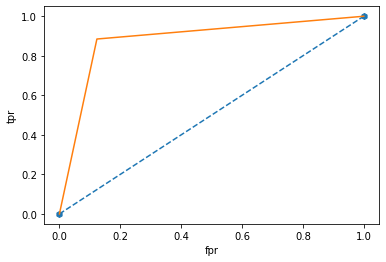

Auc Score is : 
 98.88406480608111


In [583]:
y_pred=final_model.predict(x_test)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

plt.plot([0,1],[0,1],'h--')
plt.plot(fpr,tpr, label="Extra tree classifier"%roc_auc)
plt.xlabel('fpr')
plt.ylabel('tpr')

plt.show()
auc_score=roc_auc_score(y_test, final_model_Etc.predict(x_test))
print('Auc Score is :','\n', auc_score*100)

# Final step: Saving the model

In [585]:
#saving my model
import pickle

filename='HR Analytics prediction'
pickle.dump(Etc, open(filename,'wb'))


In [586]:
import pickle
loaded_model=pickle.load(open('HR Analytics prediction','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

98.13780260707635


In [587]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['original','predicted'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,527,528,529,530,531,532,533,534,535,536
original,0,1,1,1,1,0,0,1,0,1,...,0,0,1,1,1,1,0,0,1,0
predicted,0,1,1,1,1,0,0,1,0,1,...,0,0,1,1,1,0,0,0,1,0


In [ ]:
Finally, Accuracy_score=98.13% and AUC score is 98.88%